### Code to plot comparison clusters of words on one graph

In [1]:
# from google.colab import drive
# drive.mount('/drive')

In [2]:
word = 'chanson'
translation = 'song'
# extra = 'tune'
# extra2 = 'melody'
data_length = 500
language = 'en'
layer = '12'
model_name = 'bert-base-uncased'
model_size = 512

In [3]:
# cr loanwords = ['chanson','auteur','a la mode','académie','après','bourgeois','burlesque','depanneur','detente','ennui','faux pas','fete','fin de siecle','gite','jongleur','lycee','peloton','proletariat','rendezvous']
# fr-en loanwords = ['aplomb','beige','brochure','cafe','camaraderie','cliche','clique','concierge','coup','debacle','detour','elite','ensemble','etiquette','facade','fine','foyer','naive','nuance','physique','rapport','reservoir']
# literal translations = ['academy','after','author','boredom','cottage','end of century','fashionable','high school','misstep','mockery','pack','party','relaxation','repairman','room','song','minstrel','working class','meeting','middle class']
# non-borrowed words = ['fire','nose','water','tongue','blood','bone','rain','name','louse','sweet','fly','night','ear','house','bitter','salt','knee','new','old','thick','long']

In [4]:
import pandas as pd
word_df = pd.read_pickle('Results/Results_Pickles/'+word+'_'+language+'_'+model_name+'.pkl') # pickle files not stored locally due to their size
translation_df = pd.read_pickle('Results/Results_Pickles/'+translation+'_'+language+'_'+model_name+'.pkl')
# extra_df = pd.read_pickle('/drive/My Drive/Colab Notebooks/EN_Clustering/'+extra+'_'+language+'_'+model_name+'.pkl')
# extra2_df = pd.read_pickle('/drive/My Drive/Colab Notebooks/EN_Clustering/'+extra2+'_'+language+'_'+model_name+'.pkl')

w_df = pd.concat([word_df,translation_df])


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [5]:
if layer == '12':
  layer_key = 'embeddings_layer_12'
elif layer == '11':
  layer_key = 'embeddings_layer_11'
elif layer == '10':
  layer_key = 'embeddings_layer_10'

In [6]:
import numpy as np
from sklearn.decomposition import PCA
X = np.array(w_df[layer_key].tolist()) # word_embeddings

pca = PCA(2)
df = pca.fit_transform(X)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

word_embeddings = df

# Compute silhouette coefficients for different numbers of clusters
min_clusters = 2
max_clusters = 10
silhouette_scores = []

for k in range(min_clusters, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    clusters = kmeans.fit_predict(word_embeddings)
    score = silhouette_score(word_embeddings, clusters)
    silhouette_scores.append(score)

# Plot the silhouette scores
plt.plot(range(min_clusters, max_clusters + 1), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette Coefficient for Different Numbers of Clusters')
plt.grid(True)
plt.show()

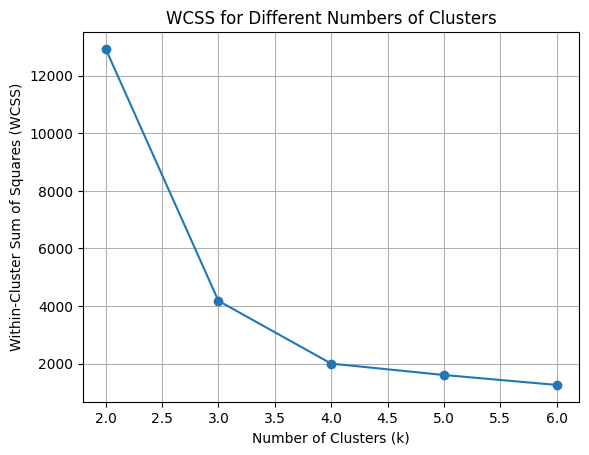

In [ ]:
# Compute within-cluster sum of squares (WCSS) for different numbers of clusters
min_clusters = 2
max_clusters = 6
wcss = []

for k in range(min_clusters, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=0,n_init=10)
    kmeans.fit(word_embeddings)
    wcss.append(kmeans.inertia_)

# Plot the within-cluster sum of squares (WCSS)
plt.plot(range(min_clusters, max_clusters + 1), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('WCSS for Different Numbers of Clusters')
plt.grid(True)
plt.show()

In [7]:
from sklearn.cluster import KMeans
import plotly.express as px

# Create text annotations for each point
words = w_df['original'].tolist()

kmeans = KMeans(n_clusters = 2,n_init=10, random_state =0 )
clusters = kmeans.fit_predict(df)

# Creating a dataframe with embeddings and sentences
data = {'x': df[:, 0], 'y': df[:, 1], 'cluster': clusters, 'word': words}
sentence_df = pd.DataFrame(data)


# Create a scatter plot with hover annotations using Plotly
fig = px.scatter(
    sentence_df,
    x='x',
    y='y',
    color='cluster',
    color_continuous_scale=px.colors.qualitative.Plotly,
    hover_data=['word'],
    width=1200,
    height=600
)
fig.update_traces(marker=dict(size=10))

# Removing the title
fig.update_layout(title_text='')

# Removing the gradient scale of cluster colors
# fig.update_coloraxes(colorscale='')

# Increasing the font size of the ticks
fig.update_layout(
    xaxis=dict(tickfont=dict(size=14)),
    yaxis=dict(tickfont=dict(size=14))
)

# Display the plot
fig.show()

In [ ]:
# computing cosine distances for embeddings

from scipy.spatial.distance import pdist

word_embeddings = X

# Calculate cosine distances using pairwise distances
distances = pdist(word_embeddings, metric='cosine')

In [ ]:
import numpy as np
av = np.mean(distances)
print("Mean distance: ",av)

Mean distance:  0.5459173126796343


In [ ]:
import numpy as np

# Calculate the standard deviation
std_dev = np.std(distances)

# Print the standard deviation
print("Standard Deviation:", std_dev)


Standard Deviation: 0.21958897114501014
